In [315]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [316]:
# Loading the dataset
df = pd.read_csv('dataset.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [317]:
# Spliting the dataset into features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [318]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [319]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [320]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
# Preprocessing the data
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', and 'poutcome' are categorical columns
# Converting non-numeric values into numeric values for fitting

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Convert categorical variables to numeric using label encoding
label_encoder = {}
for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoder[column] = le

X_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,2,0,2,0,262,0,0,0,20,9,371,1,-1,0,3
251,32,4,1,2,0,2349,0,0,0,14,1,134,5,-1,0,3
3139,34,9,2,1,0,1076,0,0,0,8,1,70,2,-1,0,3
1822,31,4,1,2,0,156,0,0,0,13,1,657,7,-1,0,3
4445,46,1,1,0,0,258,1,0,2,27,8,217,1,-1,0,3


In [322]:
# Droping the irrelevant columns
X_train = X_train.drop('contact', axis=1)
X_train = X_train.drop('day', axis=1)
X_train = X_train.drop('month', axis=1)

X_test = X_test.drop('contact', axis=1)
X_test = X_test.drop('day', axis=1)
X_test = X_test.drop('month', axis=1)

X_train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
978,34,2,0,2,0,262,0,0,371,1,-1,0,3
251,32,4,1,2,0,2349,0,0,134,5,-1,0,3
3139,34,9,2,1,0,1076,0,0,70,2,-1,0,3
1822,31,4,1,2,0,156,0,0,657,7,-1,0,3
4445,46,1,1,0,0,258,1,0,217,1,-1,0,3


In [323]:
# Splitting the dataset into training and testing sets
y_train, y_test = df.loc[X_train.index, 'y'], df.loc[X_test.index, 'y']


In [324]:
y_train.head()

978      no
251      no
3139     no
1822    yes
4445     no
Name: y, dtype: object

In [325]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
978,34,2,0,2,0,262,0,0,371,1,-1,0,3
251,32,4,1,2,0,2349,0,0,134,5,-1,0,3
3139,34,9,2,1,0,1076,0,0,70,2,-1,0,3
1822,31,4,1,2,0,156,0,0,657,7,-1,0,3
4445,46,1,1,0,0,258,1,0,217,1,-1,0,3


In [326]:
# Creating and train the KNN model
k_value = 3  # We can experiment with different values for k
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [327]:
# Evaluating the model
y_pred = knn_model.predict(X_test_scaled)

In [328]:
# Printing evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8917127071823204

Confusion Matrix:
 [[781  26]
 [ 72  26]]

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94       807
         yes       0.50      0.27      0.35        98

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.64       905
weighted avg       0.87      0.89      0.88       905



In [329]:
def predict(data):
    encoded_new_data = data.copy()

    for column, le in label_encoder.items():
        if column in encoded_new_data.columns:
            encoded_new_data[column] = le.transform(encoded_new_data[column])


    new_data_scaled = scaler.transform(encoded_new_data)

    # Make predictions using the trained KNN model
    new_data_predictions = knn_model.predict(new_data_scaled)
    return new_data_predictions
    


In [330]:
new_data = pd.DataFrame({
    'age': [30],
    'job': ['management'],
    'marital': ['single'],
    'education': ['tertiary'],
    'default': ['no'],
    'balance': [3000],
    'housing': ['yes'],
    'loan': ['no'],
    'duration': [200],
    'campaign': [2],
    'pdays': [50],
    'previous': [3],
    'poutcome': ['success']
})

new_data_scaled = predict(new_data)

# Display the predictions
print("Predictions for the new data:")
print(new_data_scaled)

Predictions for the new data:
['no']


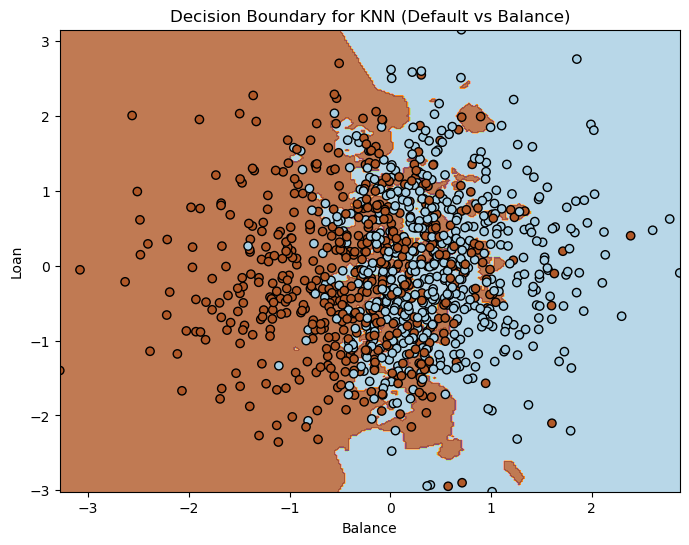

In [331]:
# VISUALISATION
# Create a toy dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)

# Extract only the relevant features (default and balance)
X_subset = X[:, [5, 7]]  # Index of features

# Fit the KNN model on the subset of features
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_subset, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plotting the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plotting the data points
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.xlabel('Balance')
plt.ylabel('Loan')
plt.title('Decision Boundary for KNN (Default vs Balance)')

# Set the x-axis and y-axis limits to reflect the actual range of the dataset
plt.xlim(X_subset[:, 0].min(), X_subset[:, 0].max())
plt.ylim(X_subset[:, 1].min(), X_subset[:, 1].max())

plt.show()